In [2]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# Define the polynomial function
def polynomial(x):
    return 5 * x**3 - 8 * x**2 - 7 * x + 1

# Generate training samples
np.random.seed(42)
X = np.random.uniform(-20, 20, 1000)
Y = polynomial(X)

# Normalize the data
X_normalized = 2 * (X - np.min(X)) / (np.max(X) - np.min(X)) - 1
Y_normalized = 2 * (Y - np.min(Y)) / (np.max(Y) - np.min(Y)) - 1

# Split data into train, validation, and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X_normalized, Y_normalized, test_size=0.1, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)


### Build the neural network model

In [4]:


model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Display model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_val, Y_val))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                64        
                                                                 


 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
29/29 [==============================] - 2s 13ms/step - loss: 0.0526 - accuracy: 0.0011 - val_loss: 0.0230 - val_accuracy: 0.0000e+00
Epoch 2/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0176 - accuracy: 0.0011 - val_loss: 0.0136 - val_accuracy: 0.0000e+00
Epoch 3/100
29/29 [==============================] - 0s 9ms/step - loss: 0.0098 - accuracy: 0.0011 - val_loss: 0.0066 - val_accuracy: 0.0000e+00


### Plotting datas

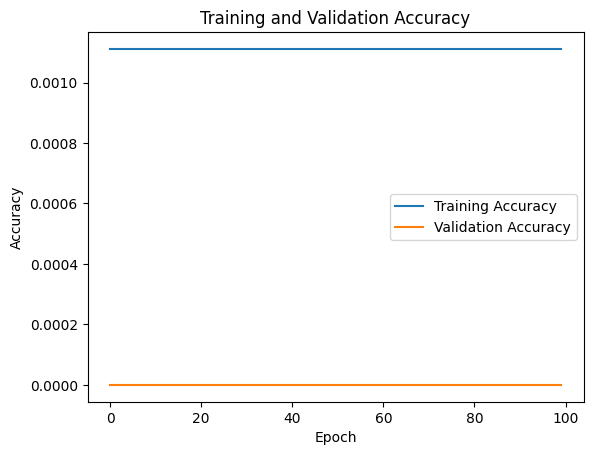

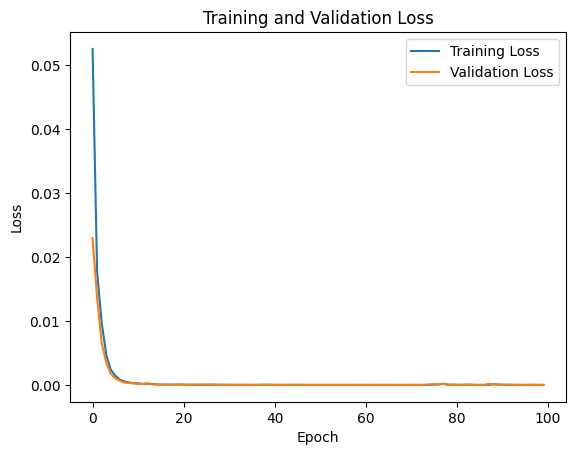

2/2 [==============================] - 0s 16ms/step - loss: 1.0629e-05 - accuracy: 0.0000e+00
Test Loss: 1.0628918971633539e-05
Test Accuracy: 0.0
2/2 [==============================] - 0s 0s/step


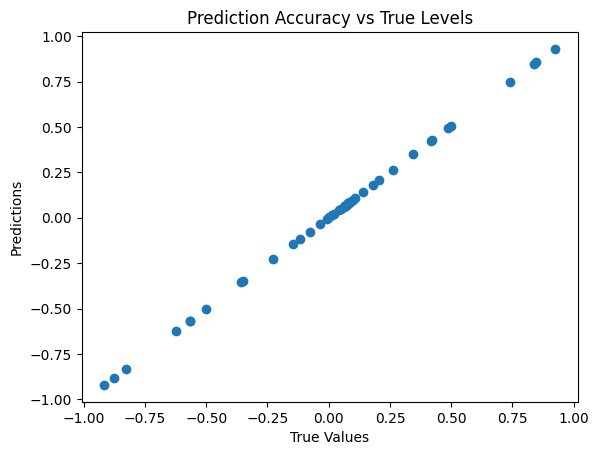

In [5]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict on test data
Y_pred = model.predict(X_test)

# Plot prediction accuracy vs true levels
plt.scatter(Y_test, Y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Prediction Accuracy vs True Levels')
plt.show()